# Init

In [ ]:
#!pip install -U -q PyDrive
#!pip install fsspec
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials
# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

# Get Data

In [ ]:
file_obj = drive.CreateFile({'id': '1TV6lJmFIHoTlfG5UlG8Bd_KdciK5vr7J'})
file_obj.GetContentFile('upwork_job_posts.csv', mimetype='text/csv')

file_obj = drive.CreateFile({'id': '1n-Mv0nri2FBrZR1lpUkfvpqco1Pr64Mo'})
file_obj.GetContentFile('upwork_freelancers.csv', mimetype='text/csv')

file_obj = drive.CreateFile({'id': '1OAhW-9JZWrGMet3waXXC8z-RpfIsUgd-'})
file_obj.GetContentFile('upwork_ideal_match.csv', mimetype='text/csv')

file_obj = drive.CreateFile({'id': '1bzwcjOVeQ1nnlm9W-VF4KFEa4gO2EViz'})
file_obj.GetContentFile('upwork_ranks.csv', mimetype='text/csv')

In [ ]:
import pandas as pd
upwork_job_posts = pd.read_csv('upwork_job_posts.csv')
upwork_freelancers = pd.read_csv('upwork_freelancers.csv')
upwork_ideal_match = pd.read_csv('upwork_ideal_match.csv')
upwork_ranks = pd.read_csv('upwork_ranks.csv')

In [ ]:
upwork_job_posts.head()

,post_key,post_title,post_desc,job_skill_string
0,44492704,Again writing,"I am sure you have come across books, blogs an...","Article Writing,Comedy,Copywriting,Ebook Writi..."
1,44492705,Personal brand identity design & development,Project process\n\n1 - Branding documentation ...,NaN
2,44492842,Need a Facebook Form ad created for our agency...,We have some PDF marketing guides we want to s...,B2B Marketing
3,44492916,Add facial hair to character,I need facial hair added to the attached caric...,"Graphic Design,Illustration,Logo Design,Print ..."
4,44494361,Virtual assistant,We will be virtual assistant for you.,NaN


In [ ]:
upwork_freelancers.head()

,freelancer_key,profile_title,profile_overview,skill_tag_string,ontology_l1,ontology_l2,ontology_l3
0,41711294.0,"ReactJS, GatsbyJS, NextJS, NodeJS, Figma, UX/U...",I have a Bachelor of Engineering (B.SE.) in So...,"Adobe Illustrator,Adobe Photoshop,Bootstrap,Fi...","Web, Mobile & Software Dev",Web Development,Full Stack Development
1,33593104.0,Google Ads (Adwords) Specialist,I am a working professional with 6 years of ex...,"Bing Ads,Dynamic Ad Setup,Google Ads,Google Ad...",Sales & Marketing,Display Advertising,Digital Marketing
2,38515701.0,"Expert Graphic designer, video editor, videogr...",I'm an expert level freelancer with high succe...,"Adobe Acrobat,Adobe Creative Suite,Adobe Illus...",Design & Creative,Animation,NaN
3,42066272.0,"Forecasting and Modeling Expert, Senior Financ...",I am a senior finance professional with over 3...,"Budget Planning,Business Modelling,Business Va...",Accounting & Consulting,Accounting & Bookkeeping,Financial Analysis & Modeling
4,47688174.0,"Content Writing - Forex, Cryptocurrency, Block...","FOR MORE THAN 3 YEARS, I HAVE BEEN WRITING ON ...","Article Writing,Bitcoin,Blockchain Architectur...",Writing,Content & Copywriting,Content Writing


# **Task 1:** SQL Excercise

You are given a table contains `n` job posts, `m` freelancers, the freelancers' ideal ranks (the lower the better) produced by a model we trust, and another ranks produced by a new model but in form of scores (the higher the better).


Each job post matches with `k` freelancers and a relevancy ranks, *from `0` to `k`*, is given to each freelancer


```
```


The goal is to compare the ranking of the 2 models and measure some metrics to see how the new model performs.

```
```

Task: Write a `SQL` query to convert the `score` column to descrete integer ranks from `0` to `k` in order to be comparable to the `ideal_rank` and calculate out metrics


## Helper Functions

In [ ]:
# https://towardsdatascience.com/have-a-sql-interview-coming-up-ace-it-using-google-colab-6d3c0ffb29dc

import sqlite3
import pandas as pd

def pd_to_sqlDB(input_df: pd.DataFrame,
                table_name: str,
                db_name: str = 'default.db') -> None:

    '''Take a Pandas dataframe `input_df` and upload it to `table_name` SQLITE table
    Args:
        input_df (pd.DataFrame): Dataframe containing data to upload to SQLITE
        table_name (str): Name of the SQLITE table to upload to
        db_name (str, optional): Name of the SQLITE Database in which the table is created. 
                                 Defaults to 'default.db'.
    '''

    # Step 1: Setup local logging
    import logging
    logging.basicConfig(level=logging.INFO,
                        format='%(asctime)s %(levelname)s: %(message)s',
                        datefmt='%Y-%m-%d %H:%M:%S')

    # Step 2: Find columns in the dataframe
    cols = input_df.columns
    cols_string = ','.join(cols)
    val_wildcard_string = ','.join(['?'] * len(cols))

    # Step 3: Connect to a DB file if it exists, else crete a new file
    con = sqlite3.connect(db_name)
    cur = con.cursor()
    logging.info(f'SQL DB {db_name} created')

    # Step 4: Create Table
    sql_string = f"""CREATE TABLE {table_name} ({cols_string});"""
    cur.execute(sql_string)
    logging.info(f'SQL Table {table_name} created with {len(cols)} columns')

    # Step 5: Upload the dataframe
    rows_to_upload = input_df.to_dict(orient='split')['data']
    sql_string = f"""INSERT INTO {table_name} ({cols_string}) VALUES ({val_wildcard_string});"""    
    cur.executemany(sql_string, rows_to_upload)
    logging.info(f'{len(rows_to_upload)} rows uploaded to {table_name}')
  
    # Step 6: Commit the changes and close the connection
    con.commit()
    con.close()


def sql_query_to_pd(sql_query_string: str, db_name: str ='default.db') -> pd.DataFrame:
    '''Execute an SQL query and return the results as a pandas dataframe
    Args:
        sql_query_string (str): SQL query string to execute
        db_name (str, optional): Name of the SQLITE Database to execute the query in.
                                    Defaults to 'default.db'.
    Returns:
        pd.DataFrame: Results of the SQL query in a pandas dataframe
    '''    
    # Step 1: Connect to the SQL DB
    con = sqlite3.connect(db_name)

    # Step 2: Execute the SQL query
    cursor = con.execute(sql_query_string)

    # Step 3: Fetch the data and column names
    result_data = cursor.fetchall()
    cols = [description[0] for description in cursor.description]

    # Step 4: Close the connection
    con.close()

    # Step 5: Return as a dataframe
    return pd.DataFrame(result_data, columns=cols)

In [ ]:
upwork_ranks.head()

,post_id,freelancer_id,ideal_rank,score
0,1480329499843878912,8052192,0,4.707499
1,1480329499843878912,31484756,1,7.743288
2,1480329499843878912,18191626,2,11.714321
3,1480329499843878912,8673929,3,9.061874
4,1480329499843878912,11823551,4,5.065439


In [ ]:
pd_to_sqlDB(input_df=upwork_ranks, table_name='ranks', db_name='upwork.db')

2022-03-22 10:53:54 INFO: SQL DB upwork.db created
2022-03-22 10:53:54 INFO: SQL Table ranks created with 4 columns
2022-03-22 10:53:54 INFO: 1000 rows uploaded to ranks


## Query

In [ ]:
sql_query_string = """
    SELECT *
    FROM ranks 
"""

sql_query_to_pd(sql_query_string, db_name='upwork.db').head()

,post_id,freelancer_id,ideal_rank,score
0,1480329499843878912,8052192,0,4.707499
1,1480329499843878912,31484756,1,7.743288
2,1480329499843878912,18191626,2,11.714321
3,1480329499843878912,8673929,3,9.061874
4,1480329499843878912,11823551,4,5.065439


# **Task 2:** Implement simple keywords extractor using TF-IDF to extract meaningful keywords from job posts found in `upwork_job_posts` dataframe

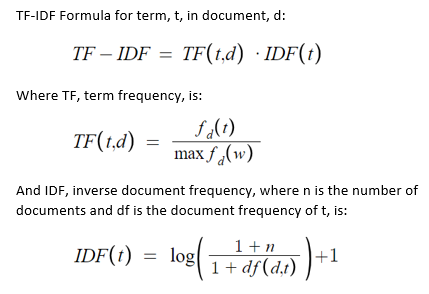

# **Task 3:** Match Feed

**You are given a table contains job posts text and skills provided by the client who made the post.
We have another table contaoins some profile text information for freelancers.
We want to find the most relevent job posts to be displayed in the freelancers' feed based on text similarity between the freelancer's profile text information and job posts text.**

In [ ]:
upwork_job_posts.head()

,post_key,post_title,post_desc,job_skill_string
0,44492704,Again writing,"I am sure you have come across books, blogs an...","Article Writing,Comedy,Copywriting,Ebook Writi..."
1,44492705,Personal brand identity design & development,Project process\n\n1 - Branding documentation ...,NaN
2,44492842,Need a Facebook Form ad created for our agency...,We have some PDF marketing guides we want to s...,B2B Marketing
3,44492916,Add facial hair to character,I need facial hair added to the attached caric...,"Graphic Design,Illustration,Logo Design,Print ..."
4,44494361,Virtual assistant,We will be virtual assistant for you.,NaN


In [ ]:
upwork_freelancers.head()

,freelancer_key,profile_title,profile_overview,skill_tag_string,ontology_l1,ontology_l2,ontology_l3
0,41711294.0,"ReactJS, GatsbyJS, NextJS, NodeJS, Figma, UX/U...",I have a Bachelor of Engineering (B.SE.) in So...,"Adobe Illustrator,Adobe Photoshop,Bootstrap,Fi...","Web, Mobile & Software Dev",Web Development,Full Stack Development
1,33593104.0,Google Ads (Adwords) Specialist,I am a working professional with 6 years of ex...,"Bing Ads,Dynamic Ad Setup,Google Ads,Google Ad...",Sales & Marketing,Display Advertising,Digital Marketing
2,38515701.0,"Expert Graphic designer, video editor, videogr...",I'm an expert level freelancer with high succe...,"Adobe Acrobat,Adobe Creative Suite,Adobe Illus...",Design & Creative,Animation,NaN
3,42066272.0,"Forecasting and Modeling Expert, Senior Financ...",I am a senior finance professional with over 3...,"Budget Planning,Business Modelling,Business Va...",Accounting & Consulting,Accounting & Bookkeeping,Financial Analysis & Modeling
4,47688174.0,"Content Writing - Forex, Cryptocurrency, Block...","FOR MORE THAN 3 YEARS, I HAVE BEEN WRITING ON ...","Article Writing,Bitcoin,Blockchain Architectur...",Writing,Content & Copywriting,Content Writing
